In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


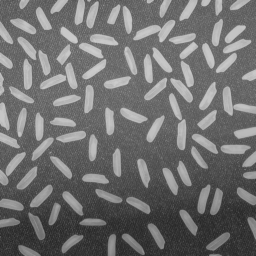

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
cv2_imshow(gImg)
#plt.imshow(gImg, cmap='gray')

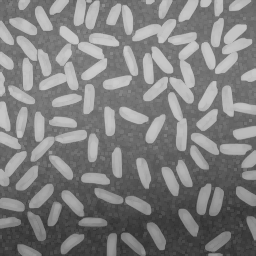

In [ ]:
kernel = np.ones((3,3),np.uint8)
dilateImg = cv2.dilate(gImg,kernel,iterations = 1)
cv2_imshow(dilateImg)

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.ubyte)

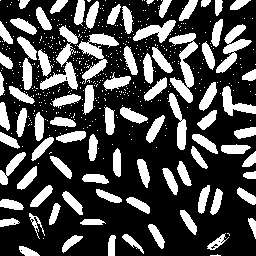

In [ ]:
threshold = 120

for h in range(gImg. shape[0]):
  for w in range(gImg. shape[1]):
     if gImg[h,w] > threshold:
       gBin[h,w] = 255

cv2_imshow(gBin)

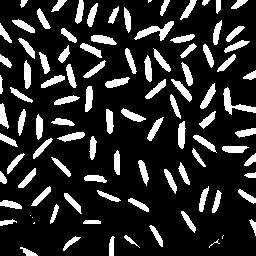

In [ ]:
kernel = np.ones((3,3),np.uint8)
erodeImg = cv2.erode(gBin,kernel,iterations = 1)
cv2_imshow(erodeImg)


In [ ]:
kernel = np.ones((3,3),np.uint8)
dilateImg = cv2.dilate(erodeImg,kernel,iterations = 1)
cv2_imshow(dilateImg)

In [ ]:
num_labels, labels_im = cv2.connectedComponents(dilateImg,8)
print('number of rices :', num_labels)

number of rices : 2


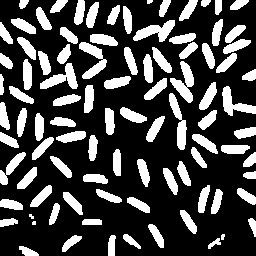

In [ ]:
kernel = np.ones((3,3),np.uint8)
openImg = cv2.morphologyEx(gBin, cv2.MORPH_OPEN, kernel)
cv2_imshow(openImg)